The goal of this project is to leverage AI/ ML model to segment customers for launching a specific targeted Ad-campaign. To make it successful, we have to segment them in at-least 3 distinct groups known as "marketing segmentation". It will help to maximize the marketing campaign conversion rate. For example the general four segments are:
1. Transactors: Customers who pay least amount of interest and very careful with the money. Generally they have lower balance(USD 104), cash advance (USD 303) and perecnt of full paymenet = 23% 
2. Revolvers : (Most lucrative sector) use credit card as a loan, generally they have highest balance (USD 5000), cash advance (USD 5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16).
3. VIP/Prime : (This group is specific target to increase credit limit and spend habbit) High credit limit (USD 16K), high percentage of full payment.
4. Low Tenure: Low tenure (7 Years), low balance.

The steps performed in this task are:
1. Visualize and explore datasets
2. Scikit-Learn library to find the optimal number of clusters using elbow method
3. k-means using Scikit-Learn to perform customer segmentation
4. Principal Component Analysis (PCA) technique to perform dimensionality reduction and data visualization

In [5]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
creditcard_df = pd.read_csv('CC GENERAL.csv')

In [7]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
# By using following info function, we can see data types and get to know about null value existance 
#(i.e, credit limit and Min payments)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
# By using following descibe function, we can get to know about important features of a coulmn, i.e, min, max and mean values
creditcard_df.describe()
#This helps to give insights about data, i.e, Balance is frequently updated on average ~0.9, scale-->(0,1)
# On average 15 percent people make full payment using CC

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Suppose we want to know about a person who made maximum "ONEOFF_PURCHASES" which is "40761.250000" given in above "describe" fun.
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
# Now lets get the features of customer who made the maximum cash advance transactions.
creditcard_df[creditcard_df['CASH_ADVANCE']>= 47137]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualize and Explore Data

<AxesSubplot:>

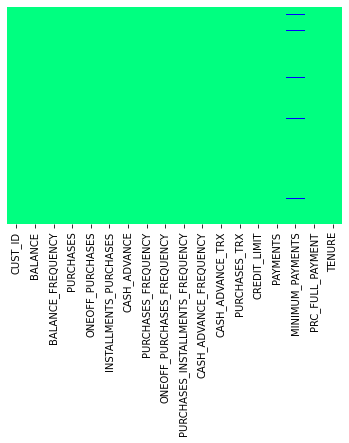

In [12]:
# Lets check misiing values, it seems that we have very less amount of missing values
sns.heatmap(creditcard_df.isnull(), yticklabels= False, cbar =False, cmap = 'winter_r')

In [13]:
#We can see we have 1 null value in "CREDIT_LIMIT" and 313 in "Minimum_Payments"
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# Lets fill these missing values with meab
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
#We will use an alternate method to fill NAN value with mean in "CREDIT_LIMIT" coulmn
creditcard_df['CREDIT_LIMIT'].fillna(value=creditcard_df['CREDIT_LIMIT'].mean(), inplace= True)

In [15]:
creditcard_df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [16]:
creditcard_df['CREDIT_LIMIT'].isnull().sum()

0

<AxesSubplot:>

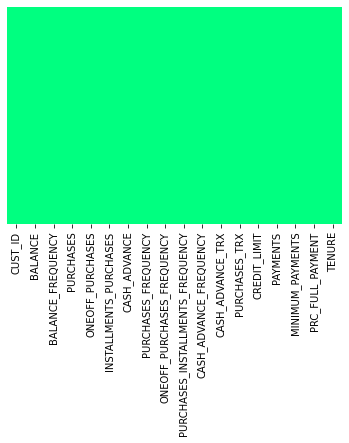

In [17]:
# So now we can see that we dont have any missing values left
sns.heatmap(creditcard_df.isnull(), yticklabels= False, cbar =False, cmap = 'winter_r')

In [18]:
# Now lets see if we have any duplicated entries and the result shows that all entries are unique
creditcard_df.duplicated().sum()

0

In [19]:
# Lets drop the ID column which dosent provide any info but a sequentail order
creditcard_df.drop(columns= 'CUST_ID', axis = 1, inplace= True)

In [20]:
print( 'Number of columns = {}'.format(len(creditcard_df.columns)))

Number of columns = 17


In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seab

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seab

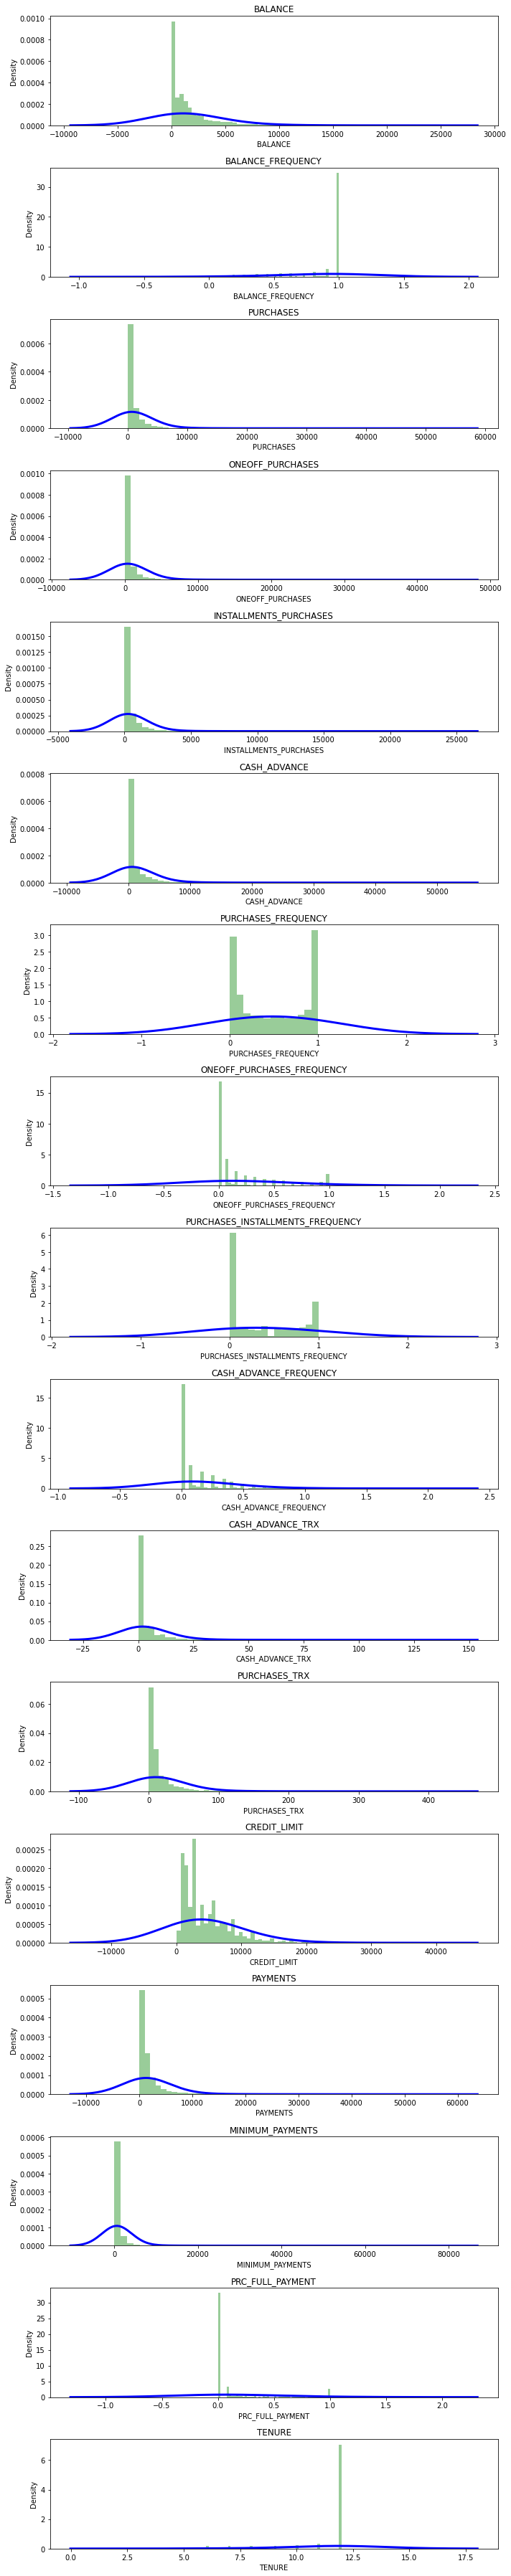

In [22]:
# Now er are going to use dist_plot which is a combination of "hist" function in matplotlib and "KDE" in seaborn
# KDE is used to plot the probability distribution function of a variable
plt.figure(figsize=(10,50))
for i in range (len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws= {'color' : 'b', 'lw': 3, 'label': 'KDE', 'bw': 1.5}, hist_kws= {'color' : 'g'})
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [23]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Now we will plot correlation between features.
The correlation coefficient has values between -1 to 1.
1.  A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
2.  A value closer to 1 implies stronger positive correlation
3.  A value closer to -1 implies stronger negative correlation

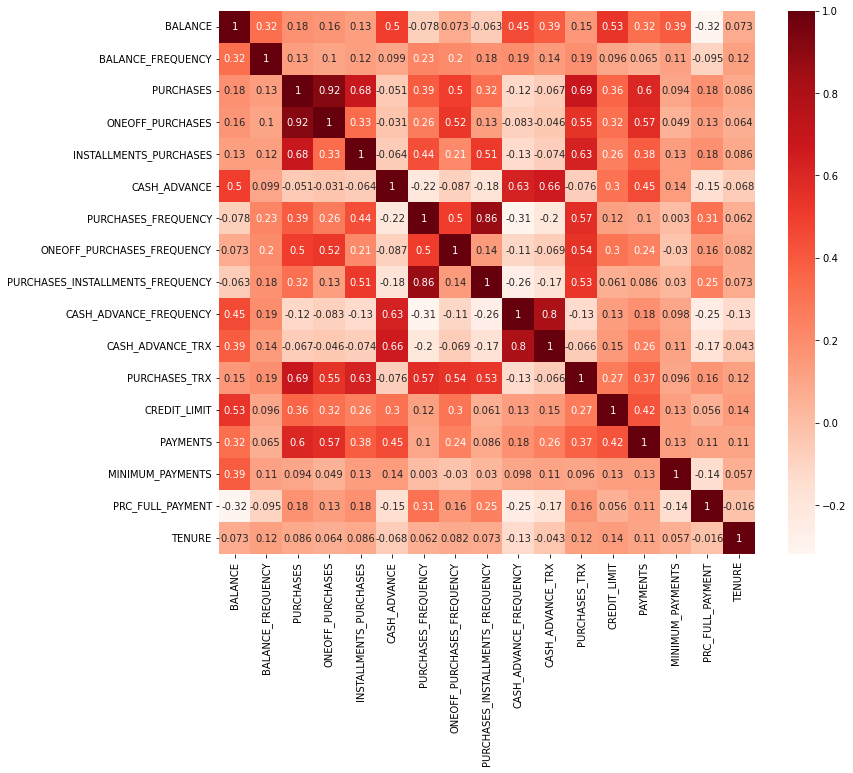

In [24]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = creditcard_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

## K-Means Algorithm

K- means is an un-supervised machine learning algorithm. It groups data in clusters in an un-supervised fashion. It uses Euclidian distance to measure similarity between attribute values. For more details, please click [here](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203).

## Elbow Method

Elbow method is a very popular method to calculate optimal number of clusters for a given problem. Within clusters the sum of 
square distance is calculated and plotted against the number of clusters. The elbow point in plot is selected as optimal number
of clusters for given problem. For more detalis, please click [here](https://predictivehacks.com/k-means-elbow-method-code-for-python/#:~:text=K-Means%20Elbow%20Method%20code%20for%20Python.%20K-Means%20is,number%20is%20not%20optimal%20for%20the%20specific%20case.)

In [25]:
#Lets re-scale data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [26]:
creditcard_df_scaled.shape

(8950, 17)

In [27]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

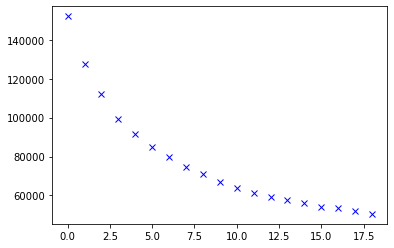

In [28]:
# Now we are going to implement Elbow method to final optimal number of clusters
first_score = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    first_score.append(kmeans.inertia_) #inertia gives the within cluster distance of each point from its centroid as we discussed above.
plt.plot (first_score, 'bx')

In [29]:
# We can see from above plot that the optimal number of clusters in this case are 7 or 8.
# So lets apply kmeans method.
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ #labels --> clusters

In [30]:
labels

array([6, 2, 4, ..., 3, 3, 3])

In [31]:
kmeans.cluster_centers_.shape

(7, 17)

In [32]:
# Lets create a dataframe consists of cluster centers
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.370507,0.331651,-0.042677,-0.233296,0.327525,-0.369208,0.974105,-0.352880,1.164385,-0.479031,-0.363552,0.167284,-0.277455,-0.224944,-0.030559,0.301783,0.252894
1,-0.701918,-2.131800,-0.307014,-0.230340,-0.302640,-0.323320,-0.547051,-0.427433,-0.441723,-0.522507,-0.376982,-0.416592,-0.172180,-0.202233,-0.257678,0.293891,0.201050
2,1.674275,0.393268,-0.204558,-0.149410,-0.209268,2.000244,-0.453795,-0.188935,-0.402833,1.911567,1.925005,-0.242096,1.013513,0.837772,0.555971,-0.390871,0.067512
3,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
4,0.136638,0.430241,0.947732,0.899644,0.588079,-0.306219,1.094985,1.867151,0.541773,-0.407415,-0.316506,1.210700,0.708734,0.397853,-0.032755,0.456706,0.307767
5,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
6,0.010569,0.402753,-0.344590,-0.225380,-0.400604,-0.100311,-0.815479,-0.337173,-0.757379,0.091679,-0.036307,-0.466315,-0.301322,-0.247141,-0.014547,-0.452079,0.272024


In [33]:
# As the data is scaled so lets perform inverse transform to know better what this data actually means
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [creditcard_df.columns])
cluster_centers
#We can seprate the four clusters given at the start of problem (i.e, Transactors, VIP) by monitoring the given attributes.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,793.295240,0.955836,912.024371,205.213584,707.244628,204.625424,0.881306,0.097187,0.827194,0.039285,0.767848,18.867897,3484.953959,1081.954208,792.991244,0.241981,11.855755
1,103.490974,0.372267,347.264163,210.119722,137.394062,300.854201,0.270793,0.074946,0.188885,0.030585,0.676198,4.354920,3867.989440,1147.698560,263.699513,0.239673,11.786375
2,5049.336277,0.970432,566.162514,344.447497,221.829639,5173.475809,0.308221,0.146095,0.204341,0.517668,16.385569,8.692221,8182.023163,4158.413008,2159.873595,0.039391,11.607666
3,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
4,1848.876256,0.979191,3028.049284,2085.661330,942.860024,336.716284,0.929821,0.759465,0.579752,0.053616,1.088906,44.803304,7073.113511,2884.890459,787.871958,0.287293,11.929190
5,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
6,1586.472332,0.972679,266.983581,218.352020,48.806306,768.514239,0.163060,0.101872,0.063436,0.153490,3.001059,3.118997,3398.116761,1017.695174,830.305060,0.021489,11.881356


In [34]:
labels.shape # values associated to each poin

(8950,)

In [35]:
labels.max()

6

In [36]:
labels.min()

0

In [37]:
# Now we can have the label associated with each point
ykmeans = kmeans.fit_predict(creditcard_df_scaled)
ykmeans

array([5, 2, 4, ..., 0, 5, 6])

In [38]:
#Lets concatenate the cluster labels with original data, which will help to plot the histograms of each cluster
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


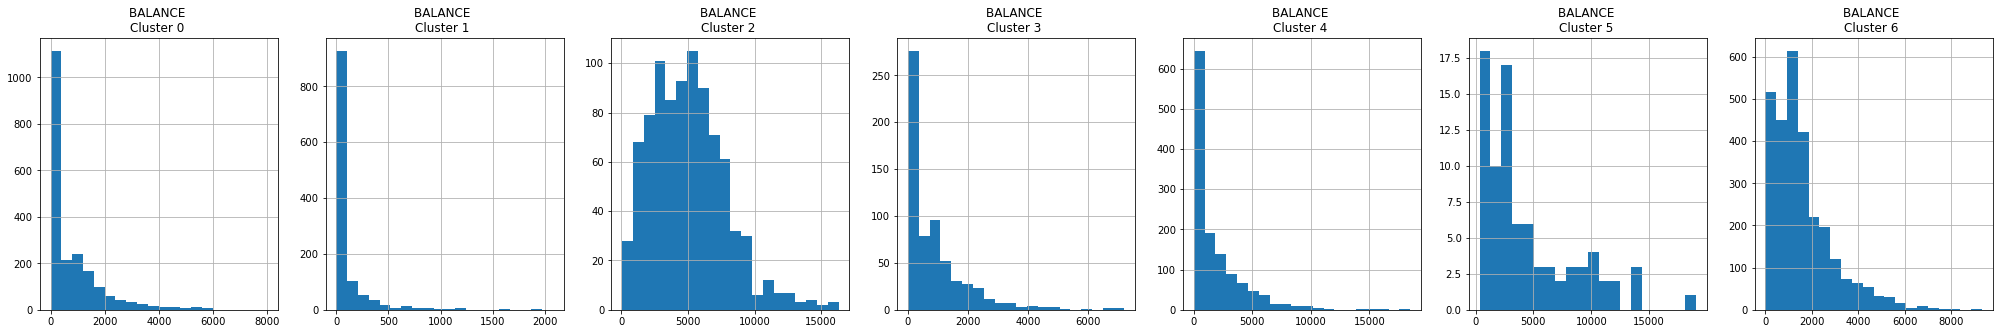

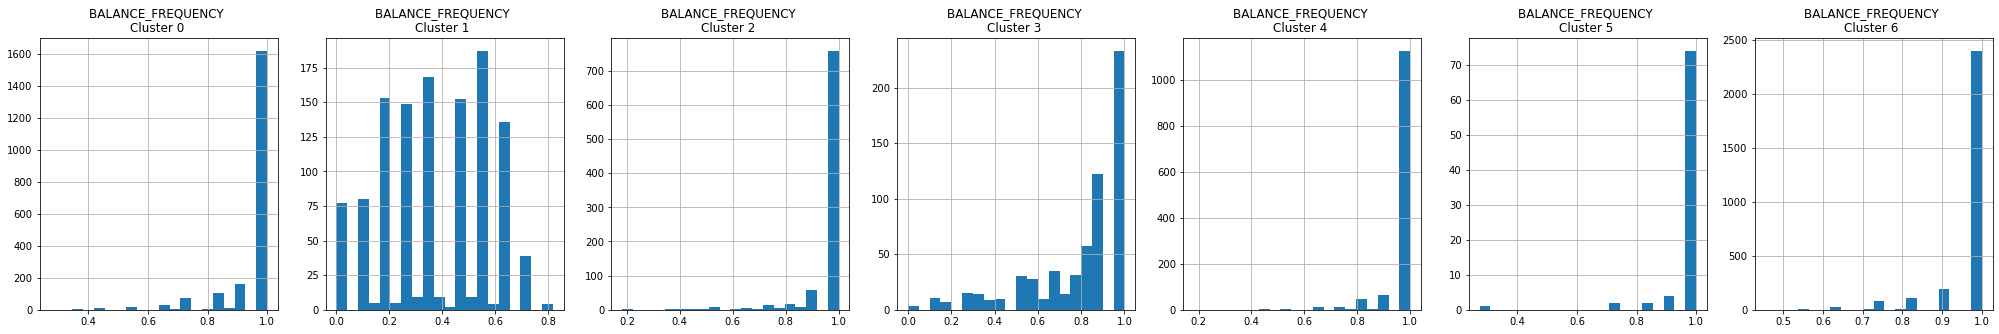

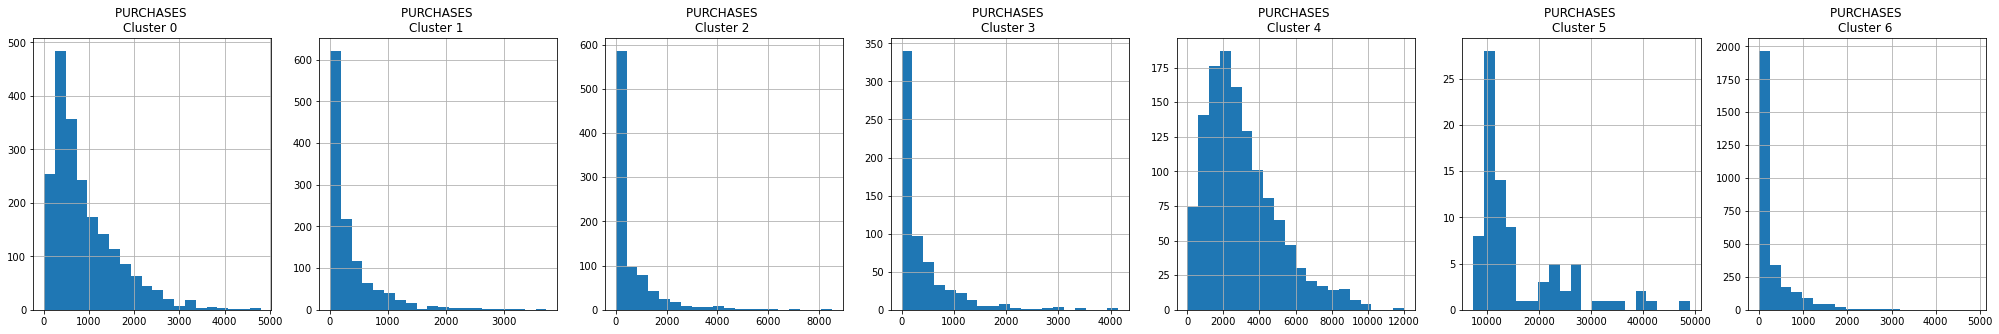

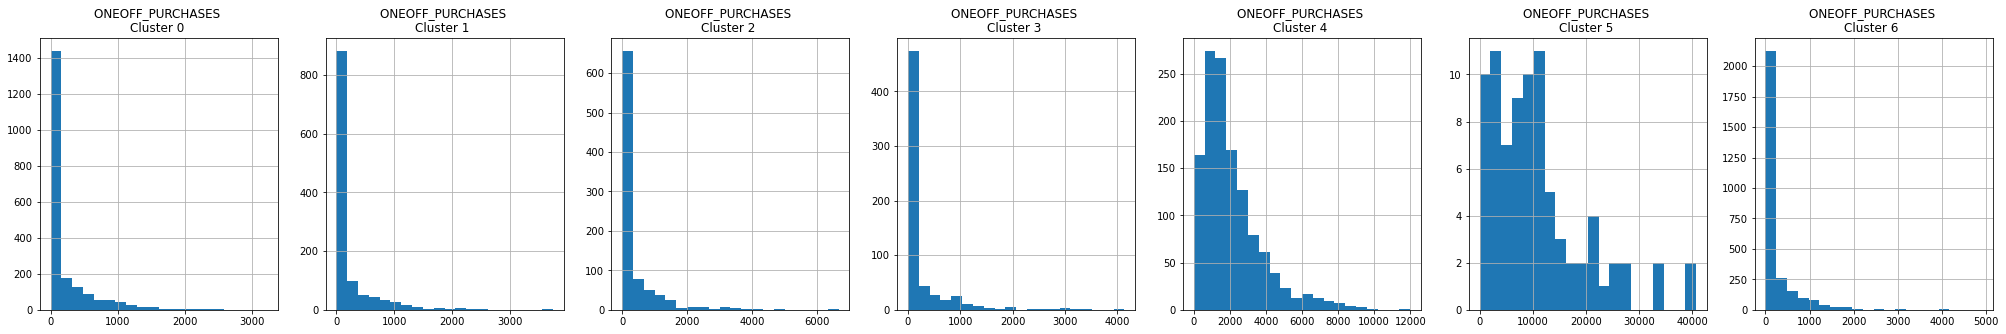

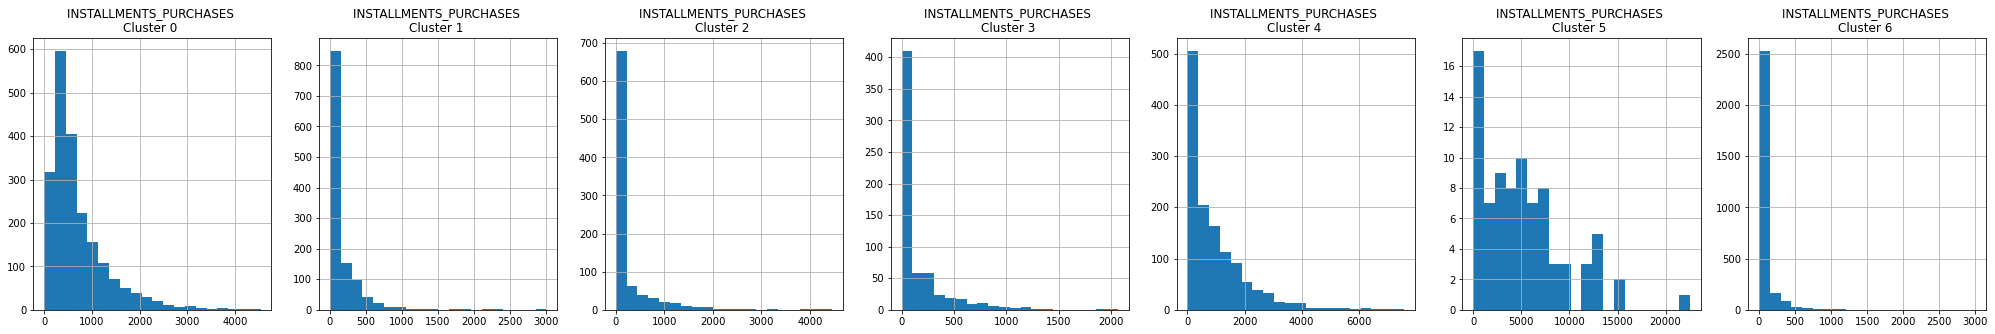

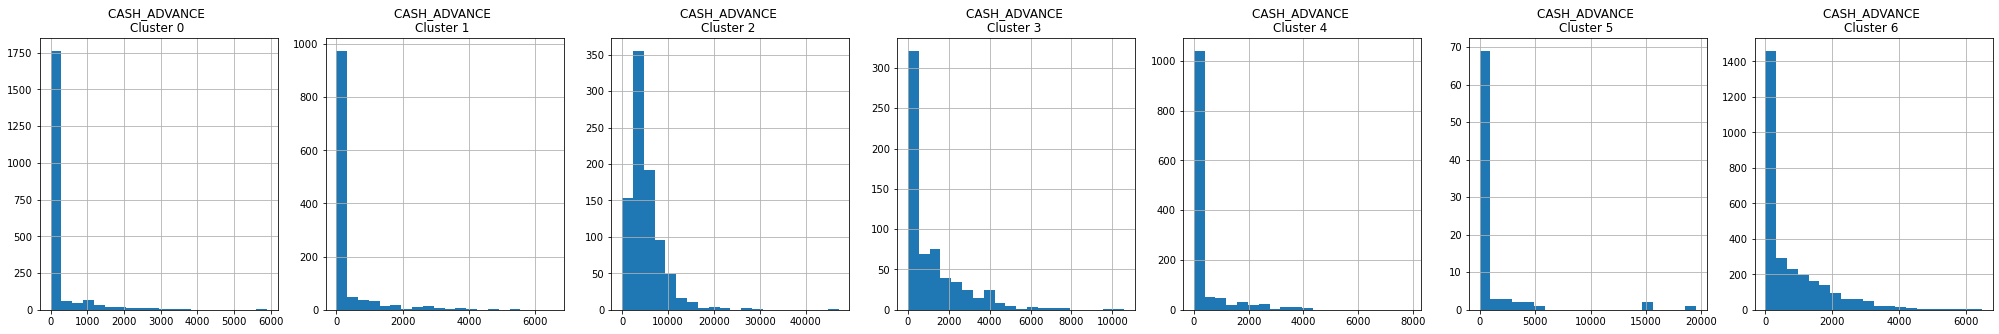

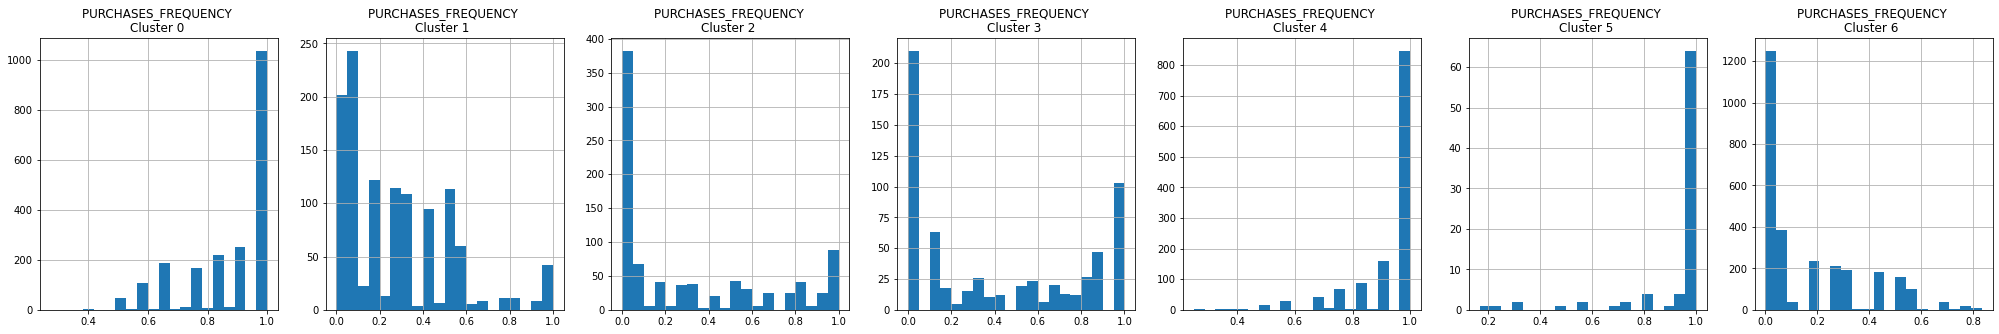

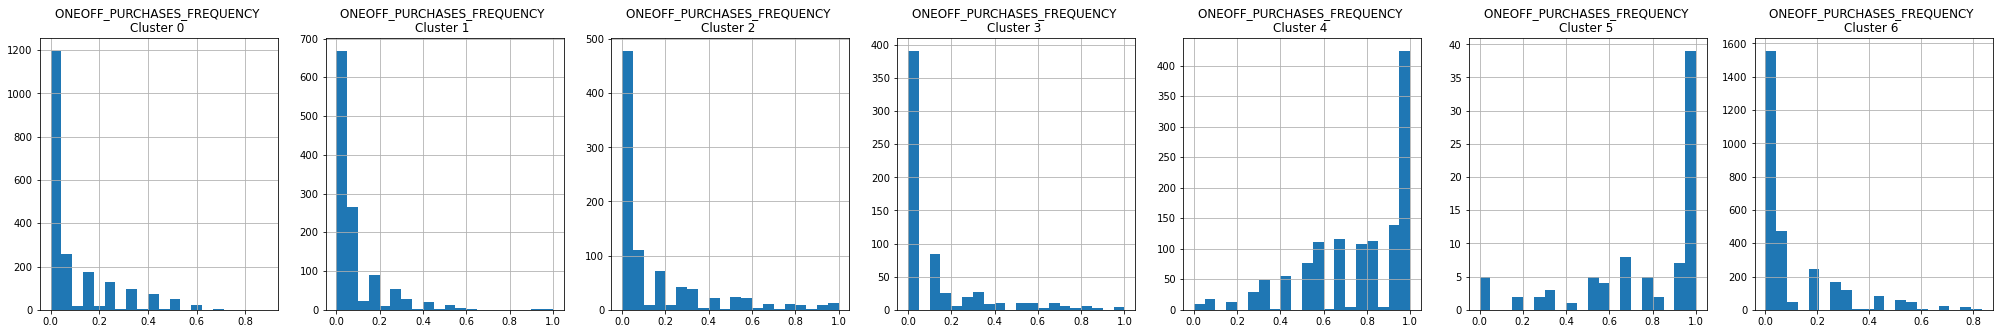

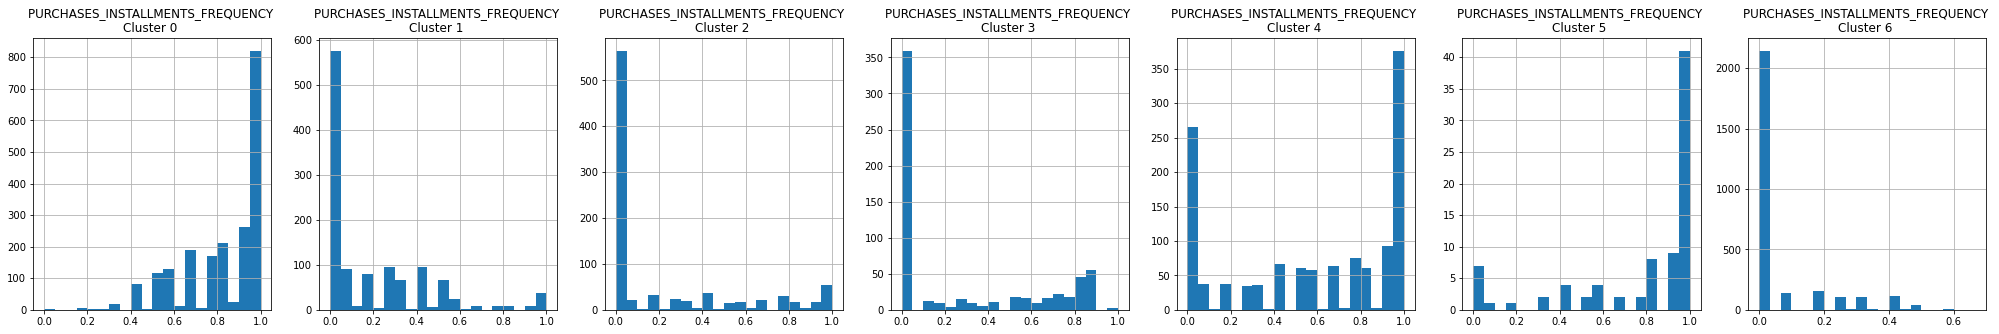

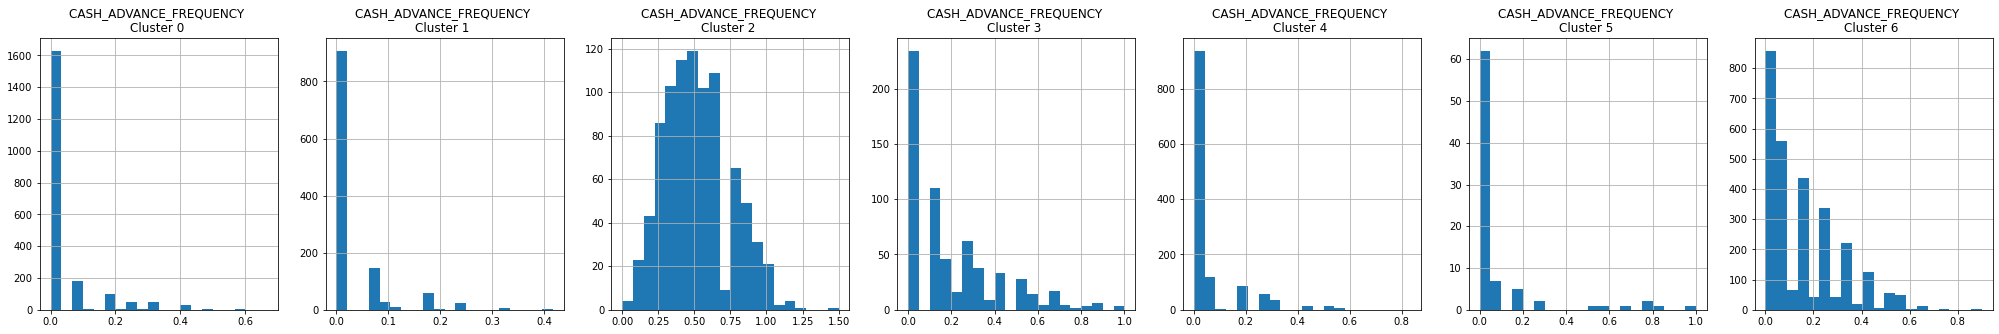

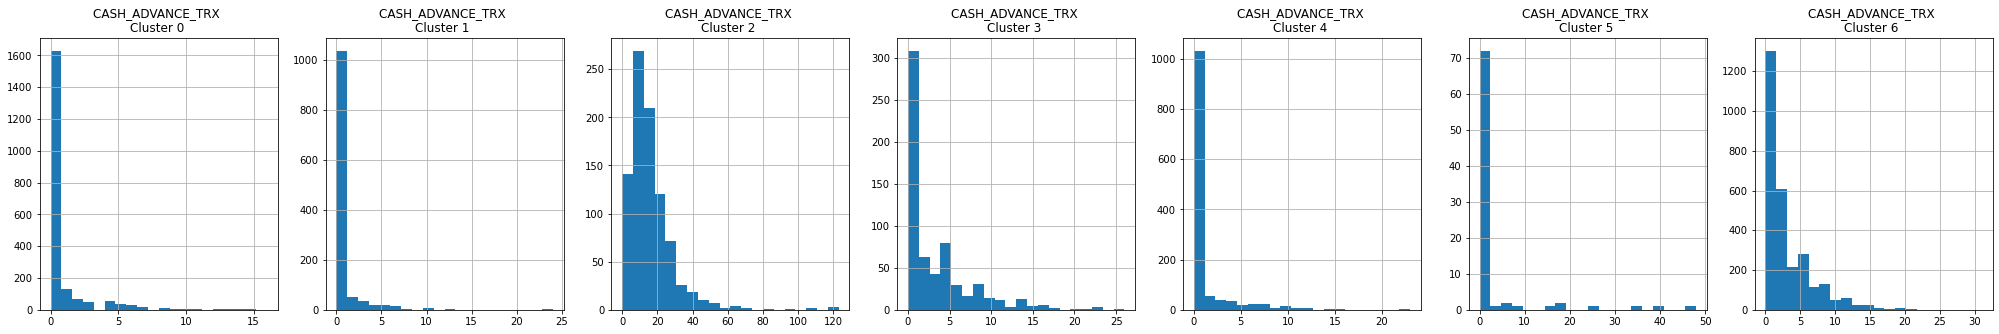

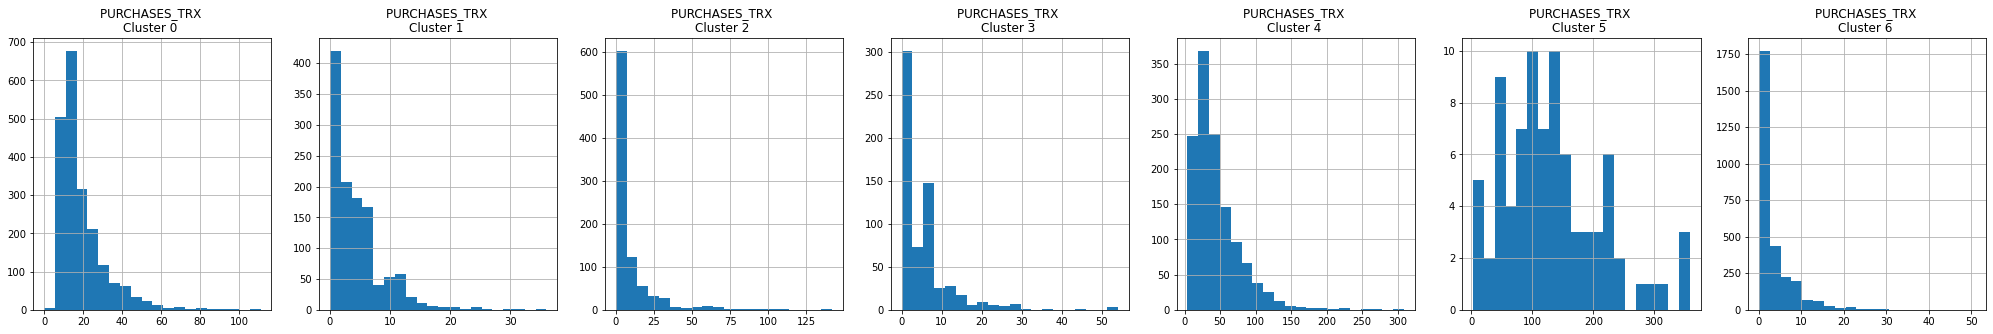

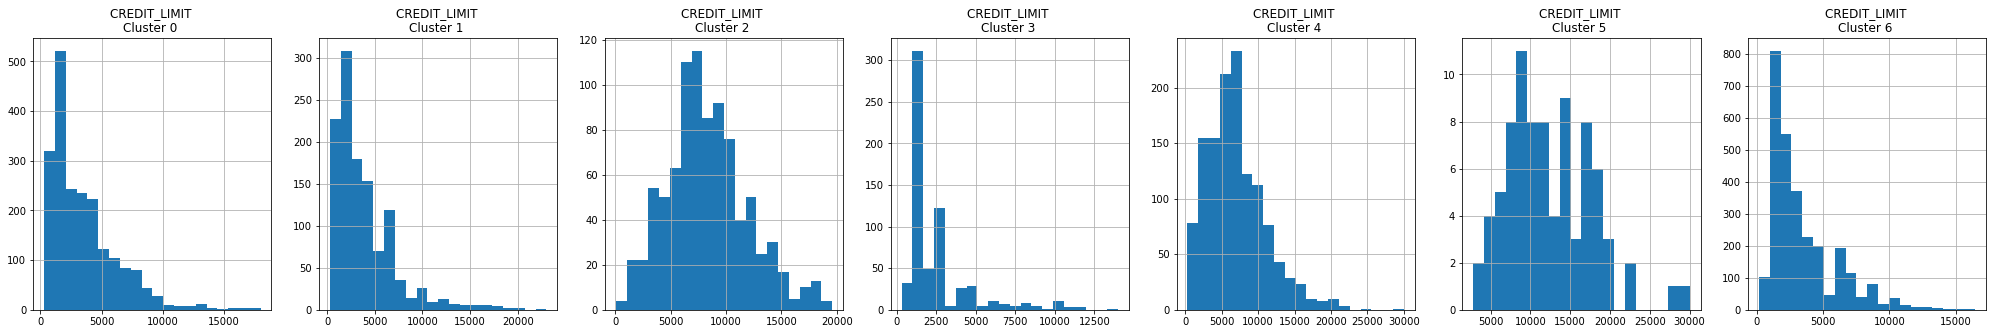

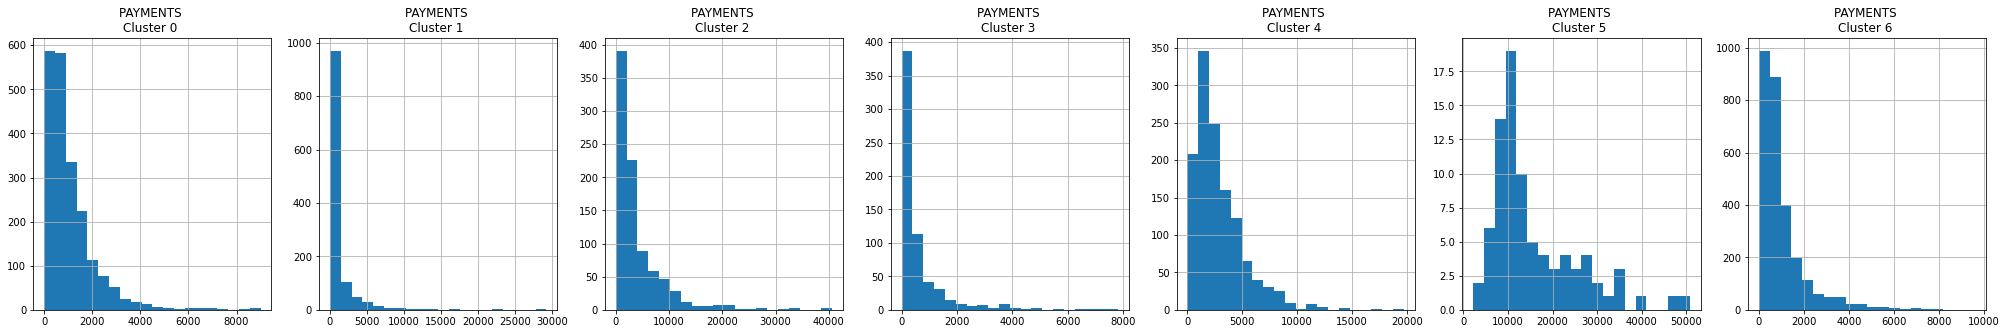

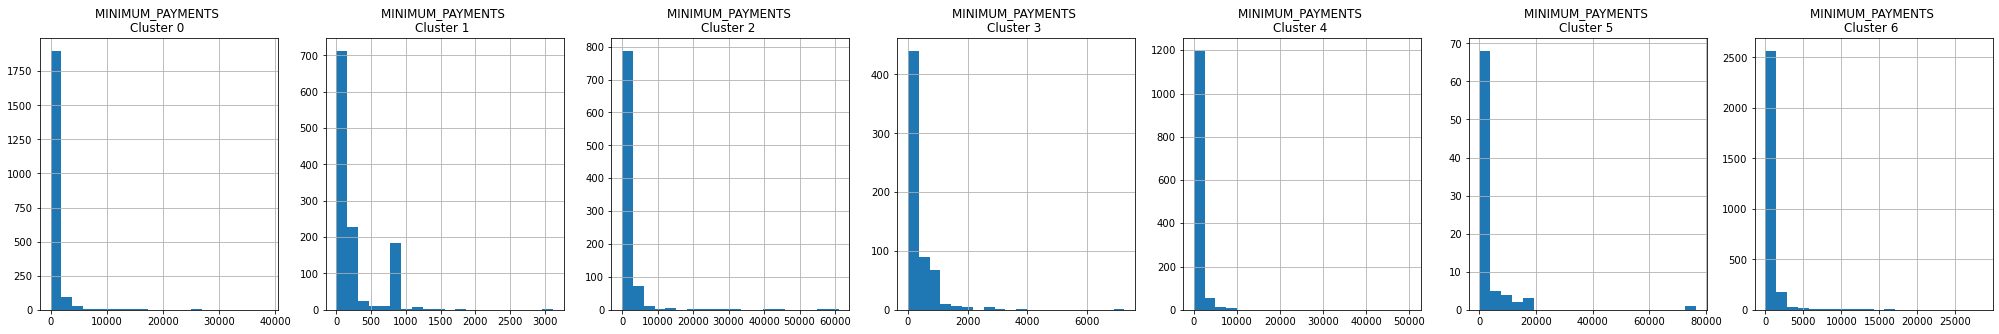

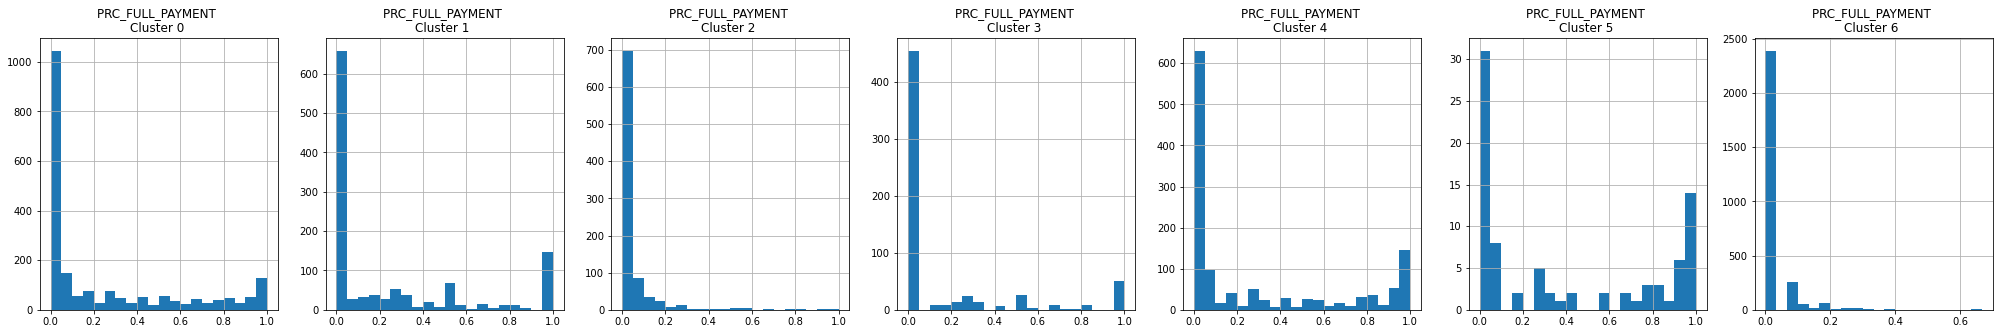

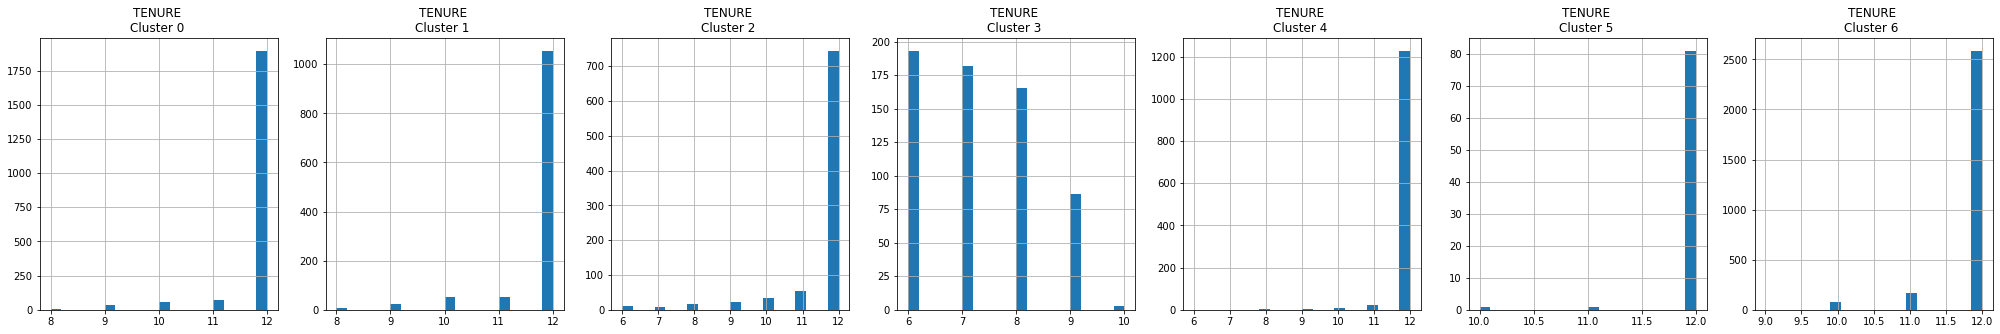

In [39]:
# Now lets plot histogram of each cluster
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{} \nCluster {} '.format(i,j))
    plt.show()

## Principal componenet Analysis (PCA)

1. PCA is an unsupervised ML algorithm that tries to reduce the dimension of data while preserving the actual information. 
2. PCA algorithm could be used for dimensionality reduction by trying to find a new set of features called components while maintaining the original information. 
For more details and real time example, please click [here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [40]:
#Lets convert our data to only 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(creditcard_df_scaled)
pca_components

array([[-1.68221976, -1.07644726],
       [-1.13829064,  2.5064843 ],
       [ 0.96967746, -0.38355207],
       ...,
       [-0.92620423, -1.81078076],
       [-2.33654861, -0.65794234],
       [-0.5564211 , -0.40046256]])

In [41]:
# create a dataframe of these two componenets
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076447
1,-1.138291,2.506484
2,0.969677,-0.383552
3,-0.873630,0.043149
4,-1.599433,-0.688571


In [42]:
#concatenate with labels
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076447,6
1,-1.138291,2.506484,2
2,0.969677,-0.383552,4
3,-0.873630,0.043149,6
4,-1.599433,-0.688571,6


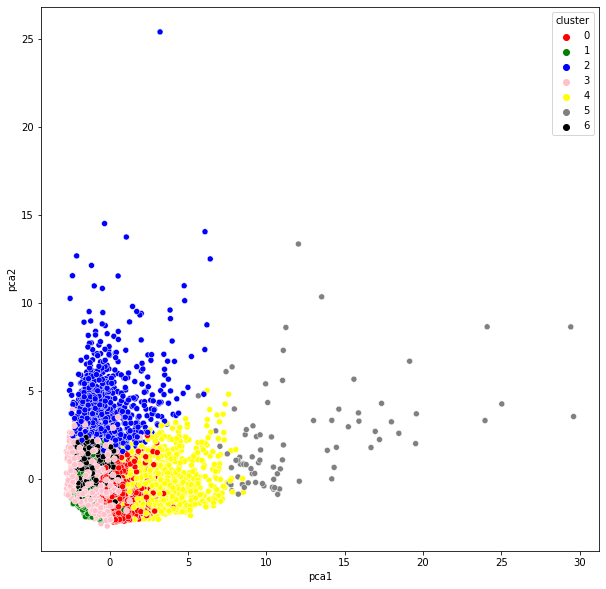

In [43]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue = 'cluster', data=pca_df, palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'black'])
plt.show()